In [ ]:
#INTRODUCTION TO THE DATASET
this dataset contains samples of handwritten digits, where each row represents a digits(0-9) encoded as a flattened 16x16 he first 256 columns 
(assuming the dataset has 256 features) correspond to the pixel intensity values, normalized to a range of 0 to 100, where:
 . 0 represents a white pixel (background).
 . 100 represents a black pixel (digit stroke).
 . Values between 0 and 100 indicate grayscale intensities.
The last column (column 257) is the label, indicating the actual digit (0-9) that the pixel data represents.
Key Observations:

#STRUCTURE:
. Each row is a sample of a handwritten digit.
. The first 256 values are pixel intensities (16x16 grid).
. The last value is the label (digit).

# NORMALIZATION
.Pixel values are scaled from 0 to 100 (not the typical 0-255), which may indicate preprocessing for consistency.

#POTENTIAL USE CASES
                                                                                                                                                                                      
. Digit recognition (classification).
. Feature extraction for machine learning models.
. Exploratory data analysis (e.g., visualizing digit patterns).

# EXAMPLE INTERPRETATION
                    
The first row (88, 92, 2, ..., 8) represents the digit 8, with pixel intensities starting at 88 (dark) and 2 (light).
This dataset is typical for tasks like MNIST-style digit classification, where the goal is to train a model to recognize handwritten digits from pixel 
data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('pen_based_handwritten.csv')

In [5]:
# Display the first few rows
print(data.head())

   88   92    2   99   16   66   94   37   70    0    0.1   24   42   65  100  \
0  80  100   18   98   60   66  100   29   42    0      0   23   42   61   56   
1   0   94    9   57   20   19    7    0   20   36     70   68  100  100   18   
2  95   82   71  100   27   77   77   73  100   80     93   42   56   13    0   
3  68  100    6   88   47   75   87   82   85   56    100   29   75    6    0   
4  70  100  100   97   70   81   45   65   30   49     20   33    0   16    0   

   100.1   8  
0     98   8  
1     92   8  
2      0   9  
3      0   9  
4      0   1  


In [6]:
# Display the last few rows
print(data.tail())

      88   92    2   99   16   66   94   37   70    0    0.1   24   42   65  \
3492  36  100   24   70    0   38   49   33   95   47     87   55   96   21   
3493  16   75   41  100   52   64   32   27    0    0     21    9   62    2   
3494  56  100   27   79    0   39   12    0   66   15    100   51   93   93   
3495  19  100    0   61    3   23   48    0   97   27    100   66   62   97   
3496  38  100   37   81   12   55    0   28   52   27    100   42   86   26   

      100  100.1   8  
3492  100      0   4  
3493  100     14   2  
3494   38     93   0  
3495   10     81   0  
3496   65      0   4  


In [7]:
print(data.describe())

                88           92            2           99           16  \
count  3497.000000  3497.000000  3497.000000  3497.000000  3497.000000   
mean     41.864741    86.063197    41.902488    85.665713    47.405776   
std      35.991986    14.738850    26.481556    17.962029    32.134929   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       8.000000    77.000000    22.000000    75.000000    19.000000   
50%      34.000000    90.000000    42.000000    94.000000    49.000000   
75%      75.000000   100.000000    60.000000   100.000000    73.000000   
max     100.000000   100.000000   100.000000   100.000000   100.000000   

                66           94           37           70            0  \
count  3497.000000  3497.000000  3497.000000  3497.000000  3497.000000   
mean     66.706034    50.668859    44.285387    56.304547    32.905919   
std      26.134147    30.347466    28.231316    35.093430    26.783980   
min       0.000000     0.000000     0

In [8]:
# Get information about the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   88      3497 non-null   int64
 1    92     3497 non-null   int64
 2     2     3497 non-null   int64
 3    99     3497 non-null   int64
 4    16     3497 non-null   int64
 5    66     3497 non-null   int64
 6    94     3497 non-null   int64
 7    37     3497 non-null   int64
 8    70     3497 non-null   int64
 9     0     3497 non-null   int64
 10    0.1   3497 non-null   int64
 11   24     3497 non-null   int64
 12   42     3497 non-null   int64
 13   65     3497 non-null   int64
 14  100     3497 non-null   int64
 15  100.1   3497 non-null   int64
 16   8      3497 non-null   int64
dtypes: int64(17)
memory usage: 464.6 KB
None


In [9]:
# Get the shape of the dataframe
print(data.shape)

(3497, 17)


In [10]:
# Get column names
print(data.columns)

Index(['88', ' 92', '  2', ' 99', ' 16', ' 66', ' 94', ' 37', ' 70', '  0',
       '  0.1', ' 24', ' 42', ' 65', '100', '100.1', ' 8'],
      dtype='object')


In [11]:
# Check for null values
print(data.isnull().sum())

88       0
 92      0
  2      0
 99      0
 16      0
 66      0
 94      0
 37      0
 70      0
  0      0
  0.1    0
 24      0
 42      0
 65      0
100      0
100.1    0
 8       0
dtype: int64


In [12]:
# Check for duplicates
print(data.duplicated().sum())

0


In [13]:
num_columns=data.select_dtypes('number')

<Axes: >

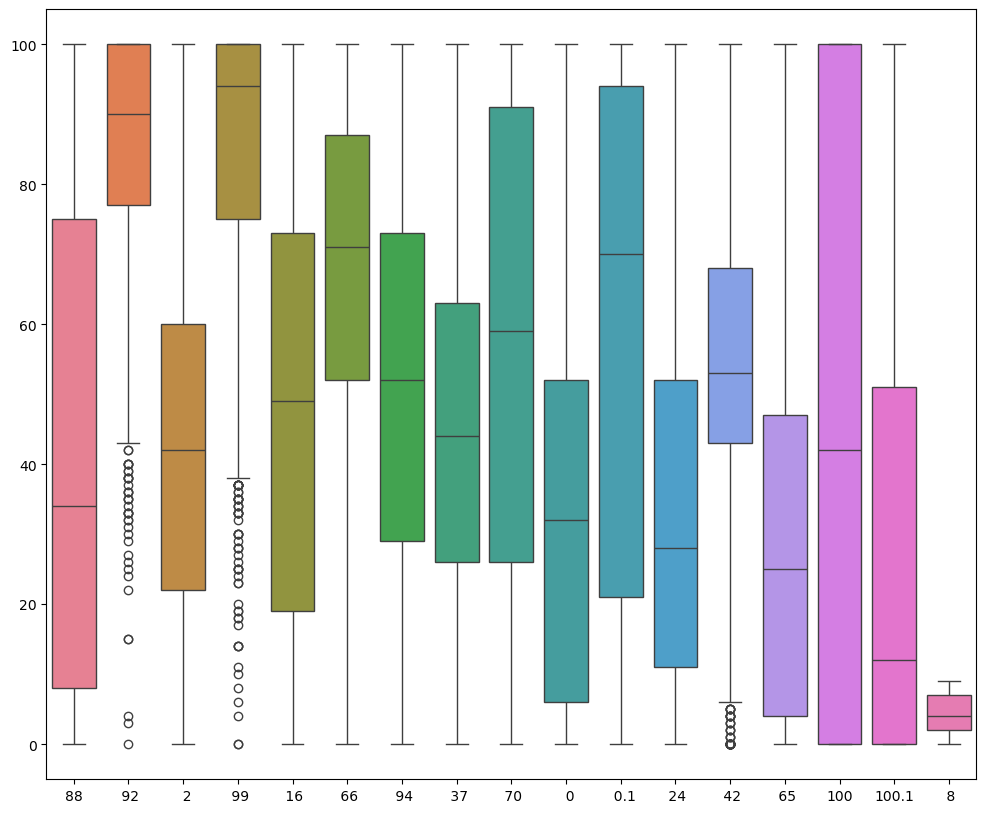

In [14]:
plt.figure(figsize=(12,10))
sns.boxplot(data)

In [15]:
# Calculate Q1, Q3, and IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_no_outliers = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Check the shape of the new dataset
print("Original shape:", data.shape)
print("Shape after removing outliers:", data_no_outliers.shape)

Original shape: (3497, 17)
Shape after removing outliers: (3347, 17)


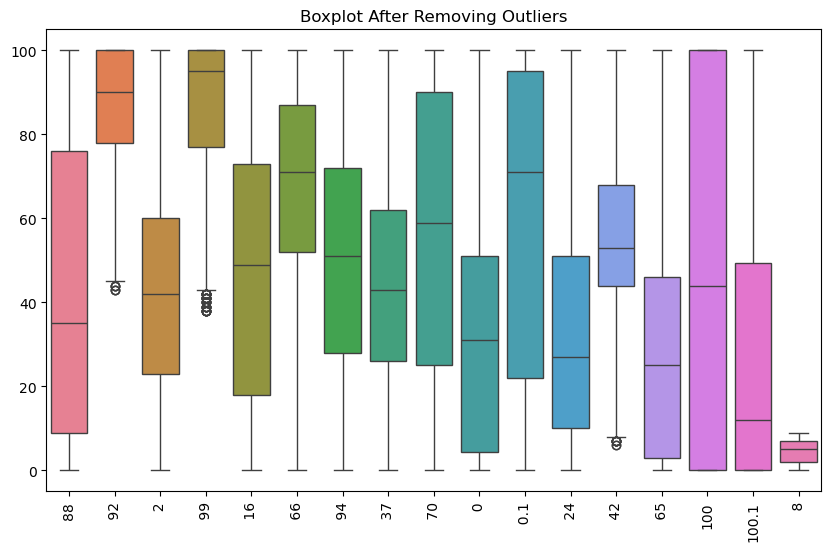

In [16]:
# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_no_outliers)
plt.title("Boxplot After Removing Outliers")
plt.xticks(rotation=90)  
plt.show()

In [17]:
data_capped=data_no_outliers

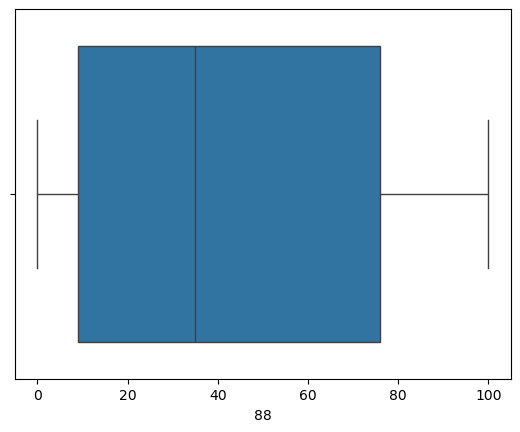

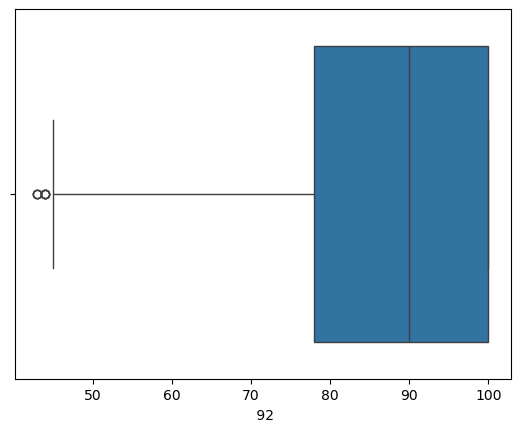

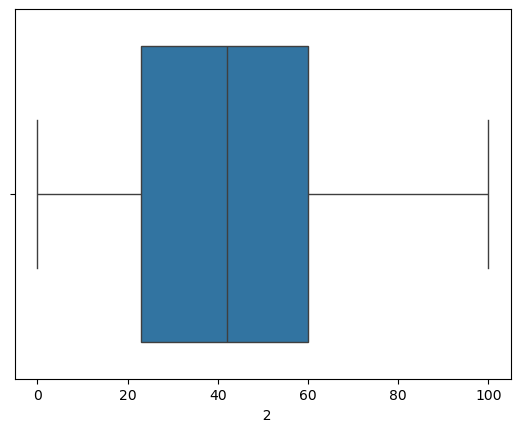

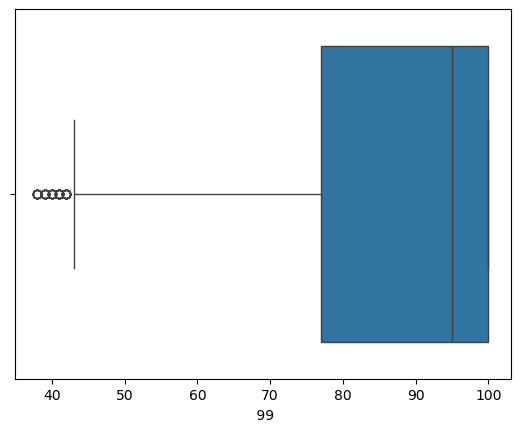

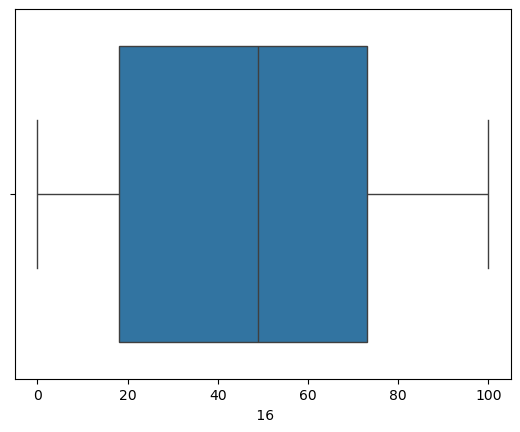

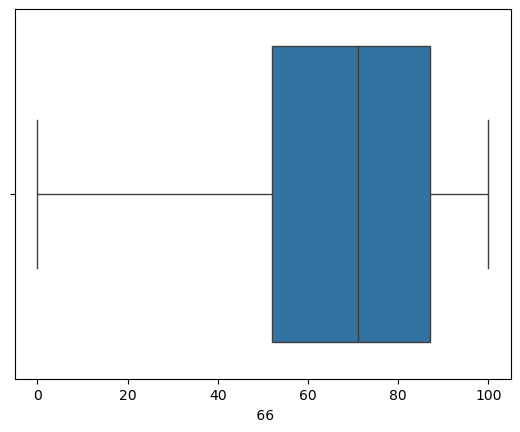

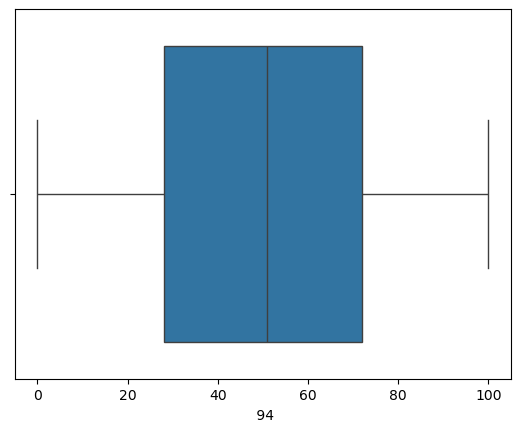

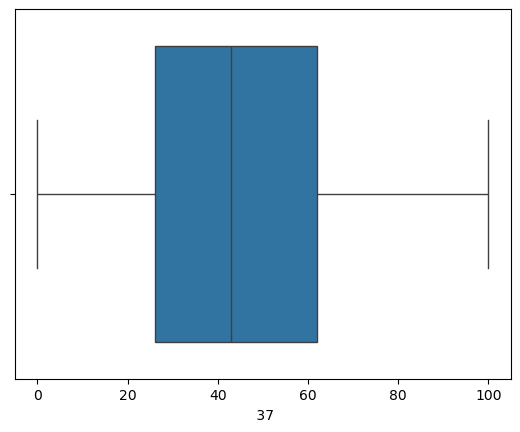

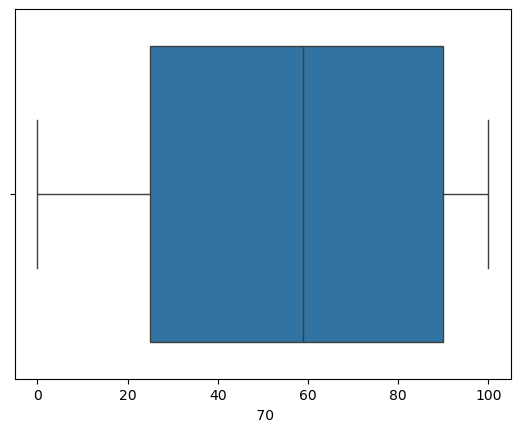

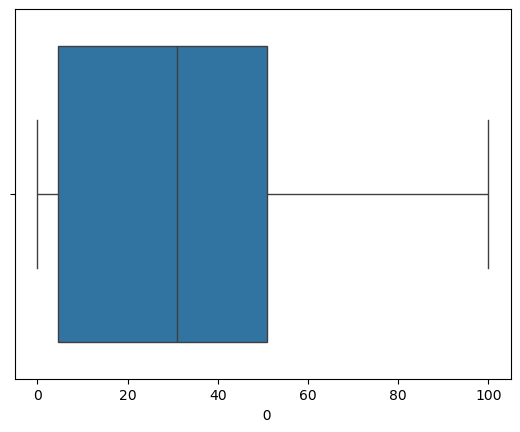

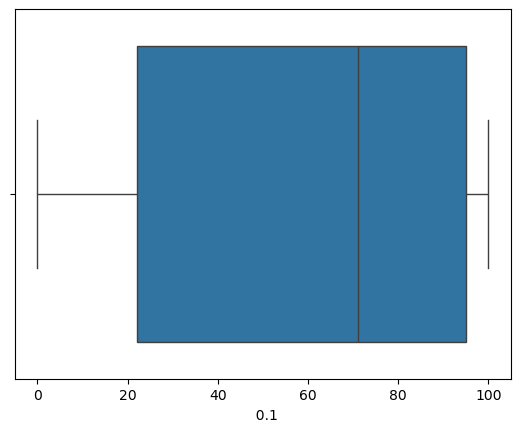

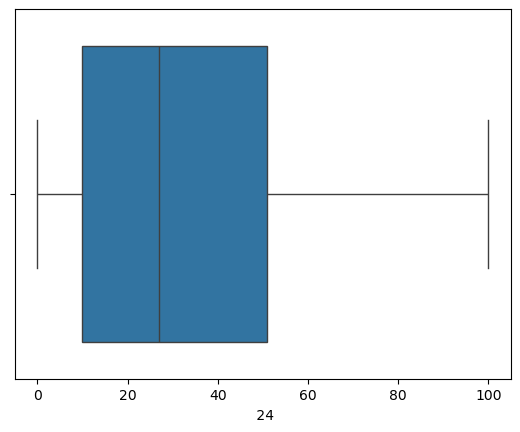

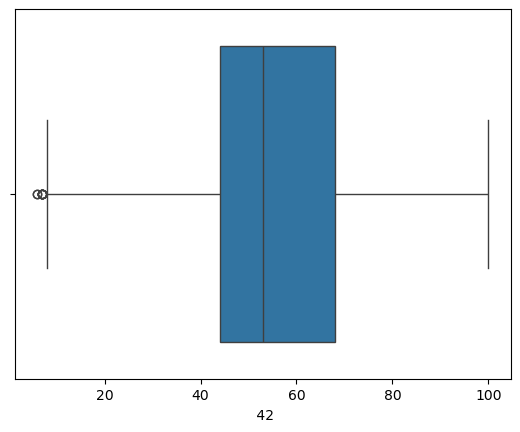

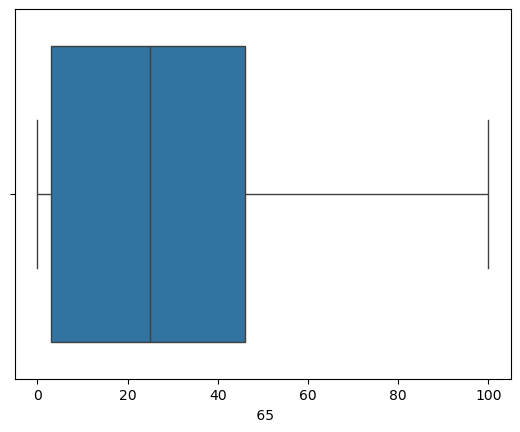

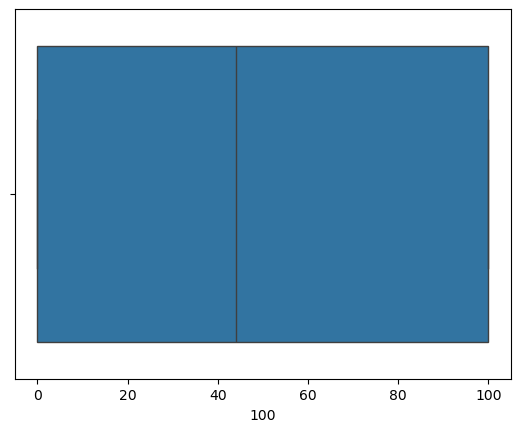

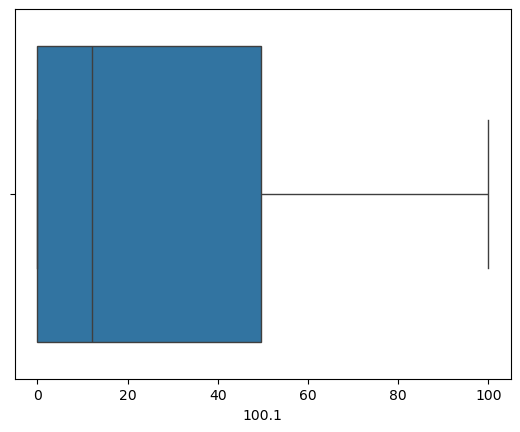

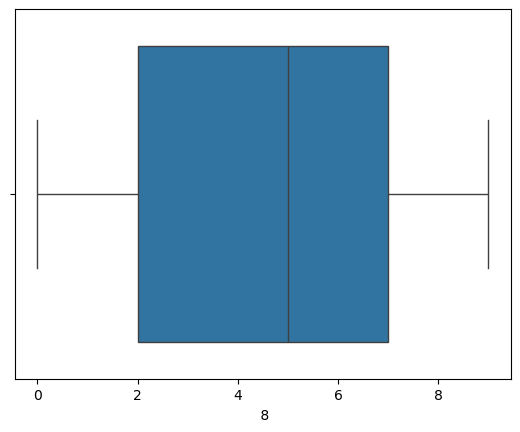

In [18]:
for i in num_columns.columns:
    sns.boxplot(data=data_capped,x=i)
    plt.show()

In [19]:
#identify the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [20]:
# Check skewness
print(X.skew())

88       0.404083
 92     -1.201497
  2      0.209930
 99     -1.305890
 16      0.005157
 66     -0.795327
 94     -0.118959
 37      0.107746
 70     -0.234631
  0      0.339244
  0.1   -0.390310
 24      0.570269
 42      0.130237
 65      0.899387
100      0.103287
100.1    0.929743
dtype: float64


In [21]:
# Apply PowerTransformer to remove skewness
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X)

In [22]:
print(X.skew())

88       0.404083
 92     -1.201497
  2      0.209930
 99     -1.305890
 16      0.005157
 66     -0.795327
 94     -0.118959
 37      0.107746
 70     -0.234631
  0      0.339244
  0.1   -0.390310
 24      0.570269
 42      0.130237
 65      0.899387
100      0.103287
100.1    0.929743
dtype: float64


In [23]:
data.columns = [f'feature_{i}' for i in range(data.shape[1] - 1)] + ['target']

In [24]:
data.corr()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,target
feature_0,1.000000,0.363693,0.313444,0.117381,-0.416860,-0.087795,-0.292191,-0.051914,-0.022272,-0.078129,0.176903,-0.122669,0.072230,-0.035918,-0.381482,0.046531,0.347749
feature_1,0.363693,1.000000,-0.047389,0.094470,-0.291983,-0.321257,-0.253040,-0.374271,-0.037399,-0.215428,0.175455,0.094774,0.119702,0.188915,-0.188844,0.169964,0.265237
feature_2,0.313444,-0.047389,1.000000,0.455531,0.405885,0.449117,-0.244696,0.287003,-0.142143,-0.035282,0.008262,-0.460657,-0.173939,-0.465091,-0.254705,-0.316672,0.217976
feature_3,0.117381,0.094470,0.455531,1.000000,0.221485,0.715529,-0.021923,0.358444,-0.146867,-0.224322,-0.211222,-0.743179,-0.128125,-0.684852,0.116516,-0.408712,0.177499
feature_4,-0.416860,-0.291983,0.405885,0.221485,1.000000,0.430483,0.379251,0.286105,-0.185468,-0.007202,-0.301171,-0.307145,-0.364925,-0.269847,0.054980,-0.129011,0.034388
feature_5,-0.087795,-0.321257,0.449117,0.715529,0.430483,1.000000,0.166641,0.791931,-0.019093,0.161392,-0.168879,-0.636094,-0.228897,-0.800130,0.113808,-0.618141,0.113885
feature_6,-0.292191,-0.253040,-0.244696,-0.021923,0.379251,0.166641,1.000000,0.381416,0.499036,0.362360,-0.102172,0.115320,-0.375934,-0.093669,0.007576,-0.112032,0.013056
feature_7,-0.051914,-0.374271,0.287003,0.358444,0.286105,0.791931,0.381416,1.000000,0.331982,0.640764,0.142052,-0.263466,-0.181519,-0.748501,-0.147289,-0.747723,0.106427
feature_8,-0.022272,-0.037399,-0.142143,-0.146867,-0.185468,-0.019093,0.499036,0.331982,1.000000,0.574025,0.629177,0.311153,-0.076186,-0.086735,-0.425822,-0.259009,-0.070827
feature_9,-0.078129,-0.215428,-0.035282,-0.224322,-0.007202,0.161392,0.362360,0.640764,0.574025,1.000000,0.469174,0.457761,-0.017976,-0.254112,-0.394660,-0.499110,-0.010523


In [25]:
correlation_matrix = data.corr()

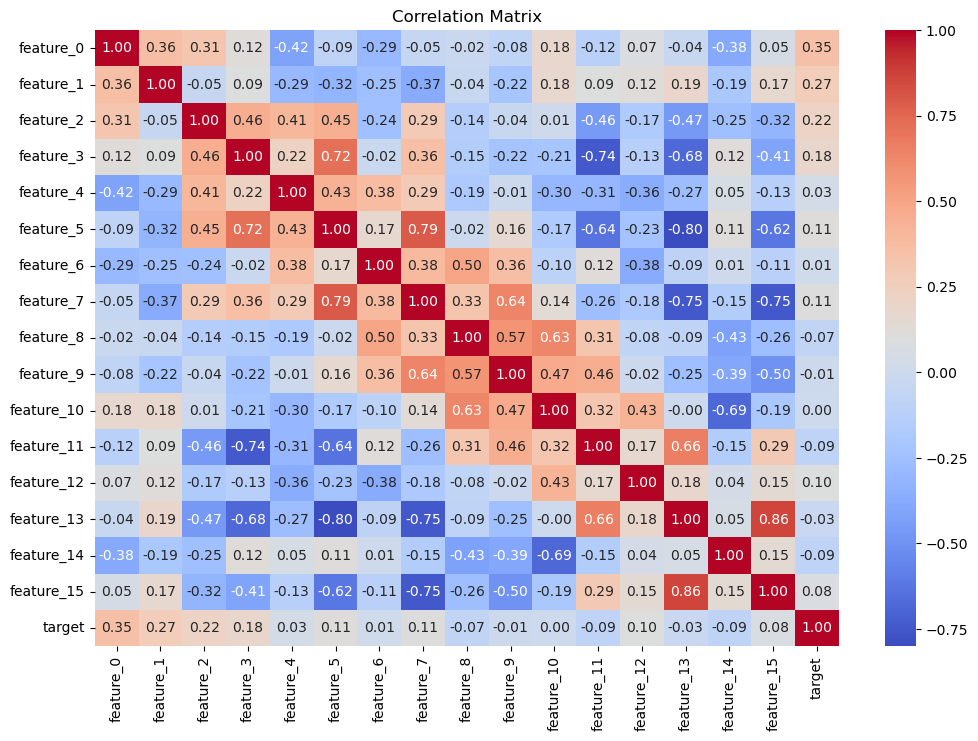

In [26]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [27]:
#  Feature Selection
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X_transformed, y)

In [28]:
# Get the scores and p-values of all features
scores = selector.scores_
p_values = selector.pvalues_

In [29]:
# Create a DataFrame to store feature names, scores, and p-values
feature_scores_df = pd.DataFrame({
    'Feature': X.columns,  
    'Score': scores,
    'P-Value': p_values    # P-values
})

In [30]:
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)
print(feature_scores_df)

Selected Features: Index(['88', ' 92', '  2', ' 99', ' 16', ' 66', ' 94', ' 37', ' 70', '  0',
       '  0.1', ' 24', ' 42', ' 65', '100', '100.1'],
      dtype='object')
   Feature       Score        P-Value
15   100.1  839.305251   0.000000e+00
13      65  754.645430   0.000000e+00
4       16  687.249548   0.000000e+00
7       37  536.406462   0.000000e+00
5       66  481.155291   0.000000e+00
10     0.1  476.167279   0.000000e+00
0       88  440.334182   0.000000e+00
8       70  427.762458   0.000000e+00
9        0  407.092377   0.000000e+00
14     100  393.848166   0.000000e+00
11      24  359.590430   0.000000e+00
1       92  313.048150   0.000000e+00
6       94  245.956816   0.000000e+00
3       99  243.492104   0.000000e+00
2        2  152.775913  4.670998e-244
12      42  113.423852  3.998203e-187


In [31]:
#  Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

In [32]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
print(f"""
X train shape : {X_train.shape}
X test shape : {X_test.shape} 
y train shape : {y_train.shape}
y test shape : {y_test.shape}
""")


X train shape : (2797, 16)
X test shape : (700, 16) 
y train shape : (2797,)
y test shape : (700,)



In [34]:
#  Model Building
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      0.93      0.96        73
           2       1.00      0.99      0.99        78
           3       0.94      1.00      0.97        65
           4       0.99      1.00      0.99        69
           5       1.00      0.97      0.99        75
           6       0.98      1.00      0.99        63
           7       0.95      1.00      0.97        55
           8       1.00      0.98      0.99        86
           9       0.98      1.00      0.99        61

    accuracy                           0.99       700
   macro avg       0.98      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700

[[75  0  0  0  0  0  0  0  0  0]
 [ 0 68  0  2  1  0  0  1  0  1]
 [ 0  0 77  0  0  0  0  1  0  0]
 [ 0  0  0 65  0  0  0  0  0  0]
 [ 0  0  0  0 69  0  0  0  0  0]
 [ 0  0  0  2  0 73  0  0  0  0]
 [ 0  0  0  0  0  0 63

In [35]:
#  Hyperparameter Tuning 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [36]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [37]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Model Evaluation:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      0.96      0.98        73
           2       1.00      0.99      0.99        78
           3       0.93      1.00      0.96        65
           4       0.99      1.00      0.99        69
           5       1.00      0.95      0.97        75
           6       0.98      1.00      0.99        63
           7       0.98      0.98      0.98        55
           8       1.00      0.98      0.99        86
           9       0.95      1.00      0.98        61

    accuracy                           0.98       700
   macro avg       0.98      0.99      0.98       700
weighted avg       0.99      0.98      0.98       700

[[75  0  0  0  0  0  0  0  0  0]
 [ 0 70  0  1  1  0  0  0  0  1]
 [ 0  0 77  0  0  0  0  1  0  0]
 [ 0  0  0 65  0  0  0  0  0  0]
 [ 0  0  0  0 69  0  0  0  0  0]
 [ 0  0  0  3  0 71  0  0  0  1]
 [ 0  0  0  0  0  0 

In [38]:
# Create a pipeline with StandardScaler and RandomForestClassifier
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

In [39]:
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

In [40]:
# Print the cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.98928571 0.9875     0.98747764 0.98747764 0.98926655]
Mean cross-validation score: 0.988201507794531


In [41]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [42]:
# Evaluate the model on the test data
test_score = pipeline.score(X_test, y_test)
print(f'Test set accuracy: {test_score}')

Test set accuracy: 0.9828571428571429


In [86]:
import joblib

In [88]:
from sklearn.impute import SimpleImputer

In [90]:
from sklearn.pipeline import Pipeline


In [92]:
# Creating a pipeline with imputer, scaler, feature selection, and model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),  # Select top 10 features
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [94]:
# Training the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('feature_selection', SelectKBest()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [96]:
# Saving the trained pipeline
joblib.dump(pipeline, 'model_pipeline.joblib')

['model_pipeline.joblib']

In [100]:
loaded_pipeline=joblib.load('model_pipeline.joblib')

In [102]:
unseen_data=pd.read_csv('unseen.csv')

In [106]:
df_unseen=pd.DataFrame(unseen_data)

In [108]:
df_unseen.head()

,88,92,2,99,16,66,94,37,70,0,0.1,24,42,65,100,100.1
0,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98
1,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92
2,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0
3,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0
4,70,100,100,97,70,81,45,65,30,49,20,33,0,16,0,0


In [110]:
predictions=loaded_pipeline.predict(df_unseen)

In [112]:
print(f" predictions : {predictions}")

 predictions : [8 0 9 ... 0 8 9]


In [ ]:
### Data Story: Analysis of Handwritten Digits Dataset
#### **Introduction to the Dataset**
The dataset comprises samples of handwritten digits (0-9), where each row represents a digit encoded as a flattened 16x16 pixel grid. The first 256 columns correspond to pixel intensity values (normalized to 0-100), and the last column (column 257) is the label indicating the actual digit (0-9). Key observations:
- **Structure**: Each row is a sample of a handwritten digit, with pixel intensities followed by a label.
- **Normalization**: Pixel values are scaled from 0 to 100 (0 = white, 100 = black, values in between = grayscale intensities).
- **Use Cases**: Digit recognition, feature extraction, and exploratory data analysis (e.g., visualizing digit patterns).
#### **Data Exploration**
1. **Initial Inspection**:
   - The dataset has 3,497 rows (samples) and 17 columns (256 pixel features + 1 label).
   - No missing or duplicate values were found, indicating clean data.
   - Descriptive statistics (mean, min, max, etc.) show pixel intensities vary across the dataset, with some columns having higher averages (e.g., column 100).
2. **Visualization**:
   - Boxplots revealed potential outliers in pixel intensities. After removing outliers, the dataset reduced to 3,347 rows.
   - The label distribution (column '8') shows digits range from 0 to 9, with an average label value of ~4.43.
#### **Key Findings**
1. **Pixel Intensity Patterns**:
   - Higher-intensity pixels (darker strokes) are concentrated in certain columns, suggesting common digit structures (e.g., loops in '8' or vertical lines in '1').
   - Lower-intensity pixels (lighter/background) dominate other areas, indicating variability in digit positioning.
2. **Outliers**:
   - Outliers in pixel intensities could represent unusual handwriting styles or noise. Their removal improved data consistency.
3. **Label Distribution**:
   - The dataset is somewhat balanced, with all digits (0-9) represented. Further analysis could confirm if any digit is over/underrepresented.
#### **Potential Next Steps**
1. **Feature Engineering**:
   - Extract statistical features (mean, variance) from pixel intensities to enhance model performance.
   - Apply dimensionality reduction (e.g., PCA) to reduce noise and highlight key features.
2. **Model Building**:
   - Train classifiers (e.g., Random Forest, SVM, Logistic Regression) to predict digits from pixel data.
   - Evaluate models using metrics like accuracy, precision, and recall.
3. **Visualization**:
   - Plot sample digits to visualize patterns and misclassifications.
   - Use confusion matrices to identify commonly confused digits (e.g., '3' vs. '5').
#### **Conclusion**
This dataset is well-suited for digit classification tasks. Initial exploration shows clean, structured data with clear patterns in pixel intensities. Future work will focus on modeling and feature optimization to achieve high accuracy in digit recognition.
